In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
# importing the basis neccessary library

# Machine Learning Assignment :- Customer Churn Prediction

In [285]:
df = pd.read_excel('customer_churn_large_dataset.xlsx')# reding the data set

In [286]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [287]:
df.info()# Display basic information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [288]:
df.describe()# Descriptive statistics of the dataset

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [289]:
df.isnull().sum()# Check for missing values

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

From the Basis analysis it is clear to say that the Data have no null value also on the outlier section there is not instant or  very high  increase or the data is very much  evenely distributed as we can see on the df.describe()

In [290]:
column = ['Total_Usage_GB','Monthly_Bill','Subscription_Length_Months','Age']

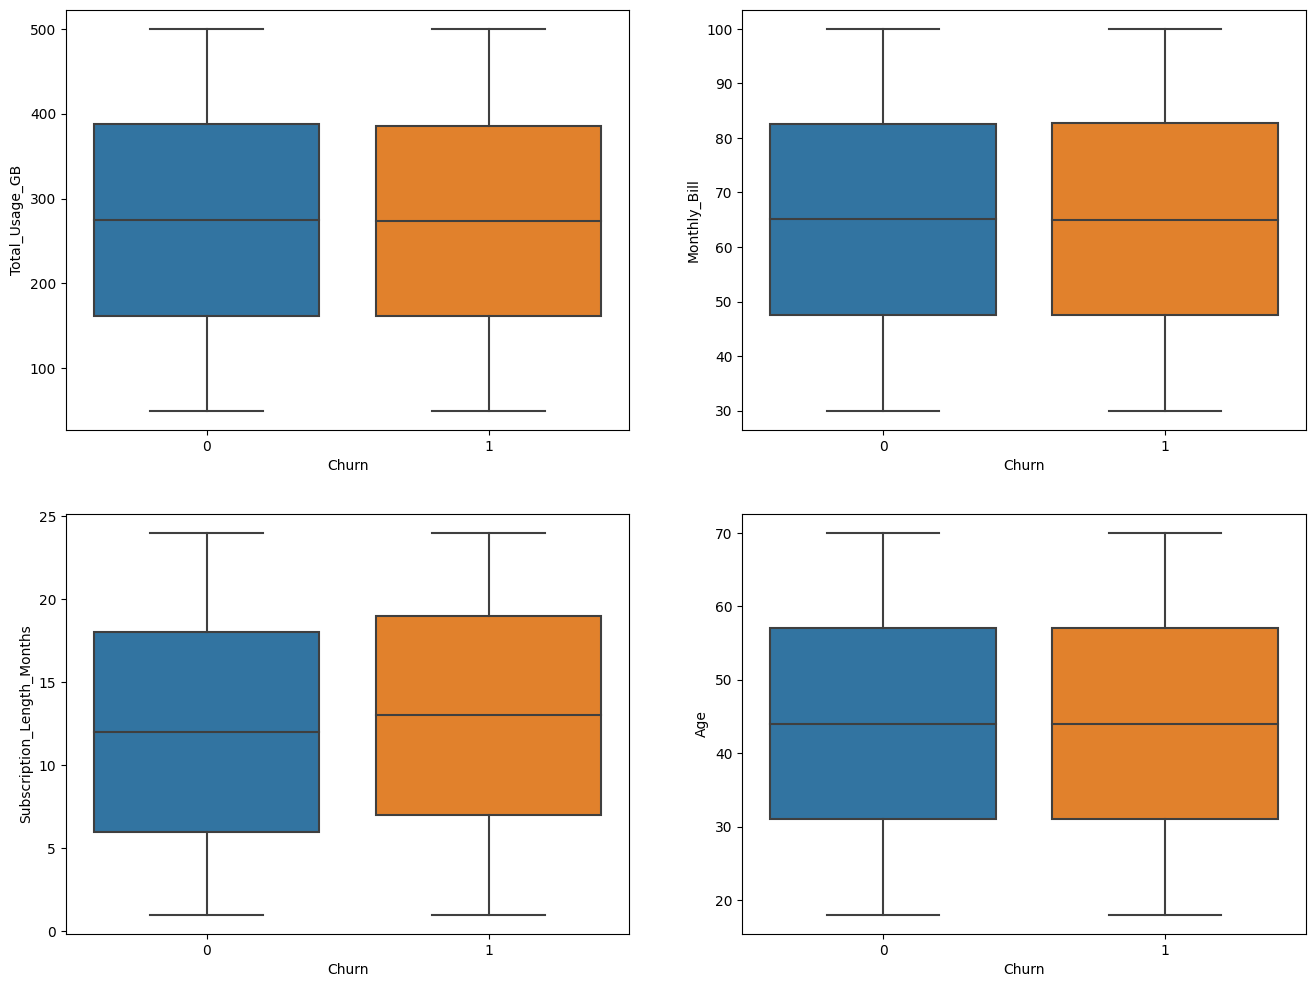

In [291]:
fig,axes= plt.subplots(nrows=2,ncols=2,figsize=(16, 12))  # Checking for the outlier using the  boxplot
count=0
for i in range(2):
    for j in range(2):
        sns.boxplot(data=df,x='Churn',y=column[count],ax=axes[i,j])
        count +=1

As on the above Diagram we can see  that there is not outlier in the dataset


<Axes: xlabel='Gender', ylabel='count'>

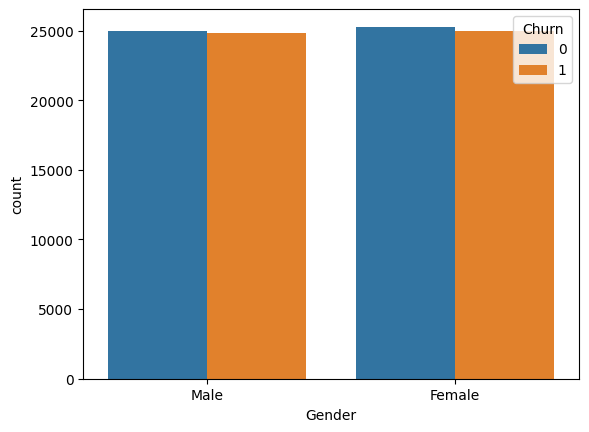

In [292]:
sns.countplot(data=df,x='Gender',hue='Churn')# Data visualization to understand relationships


<Axes: xlabel='Location', ylabel='count'>

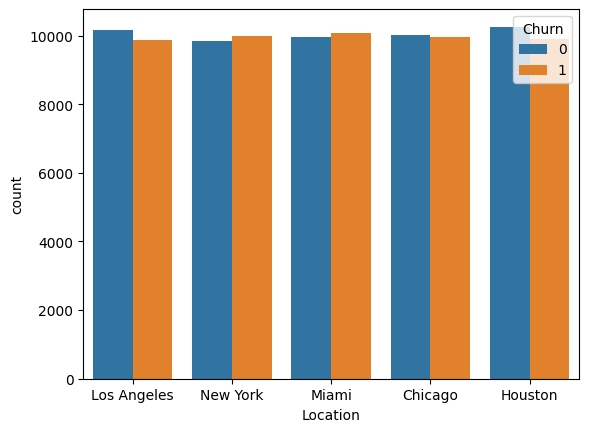

In [293]:
sns.countplot(data=df,x='Location',hue='Churn')

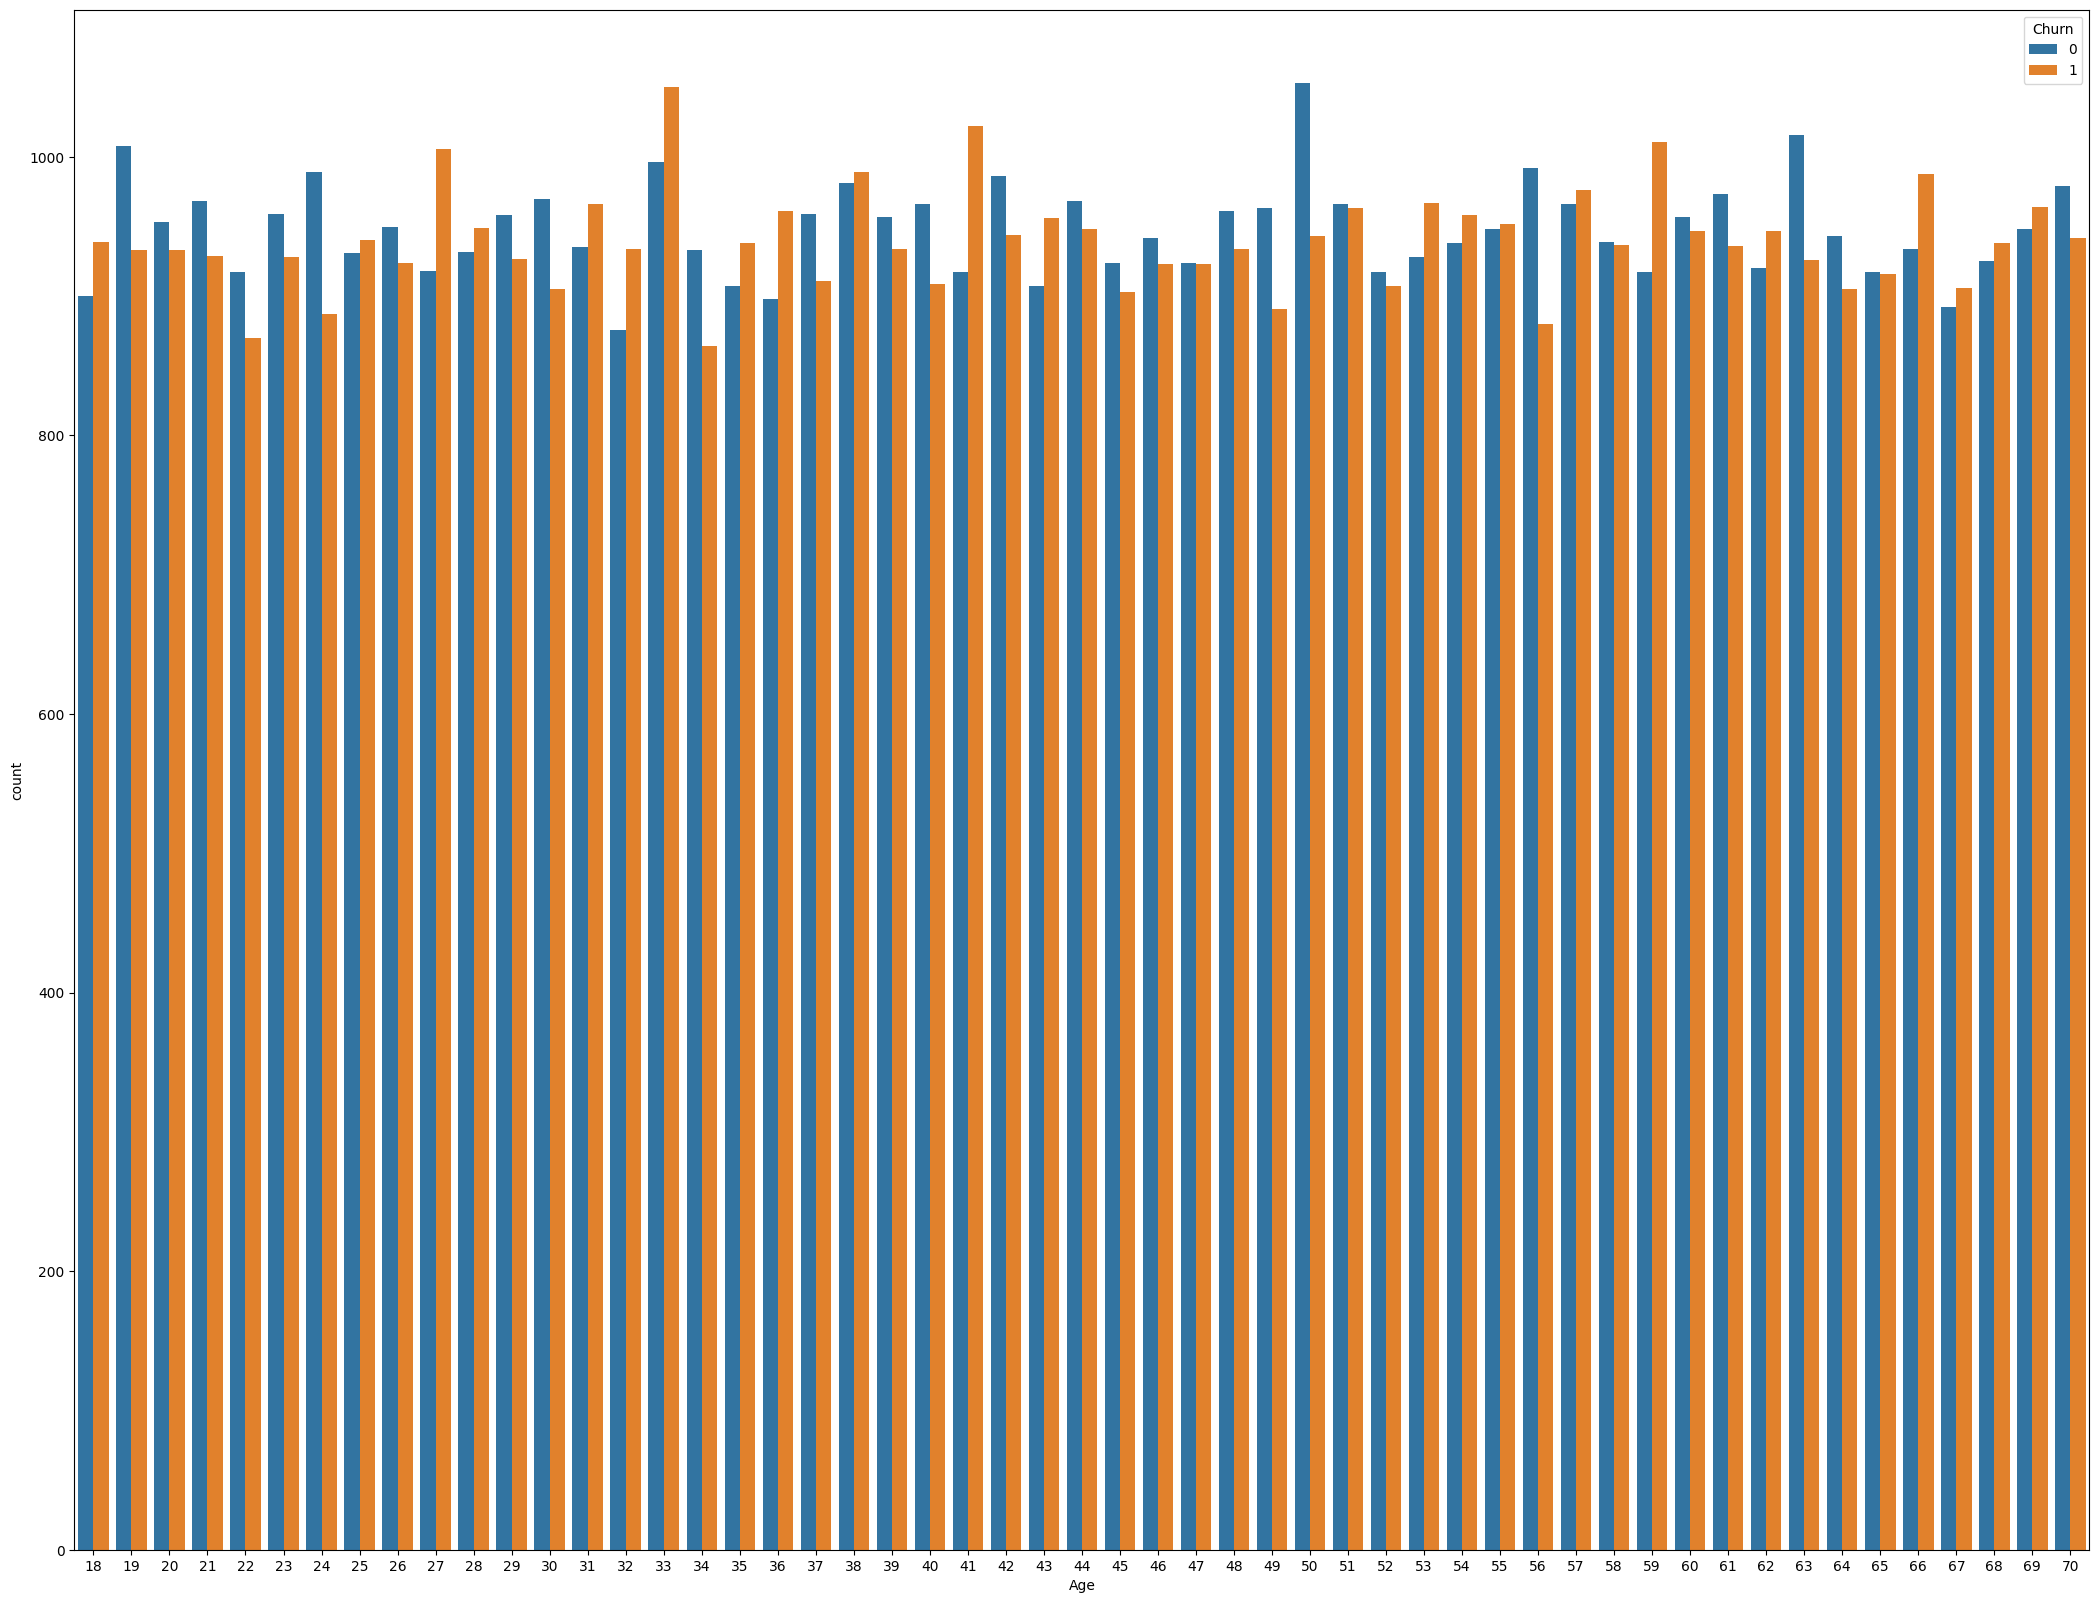

In [294]:
plt.figure(figsize=(26,20))# Plotting age distribution
sns.countplot(data=df, x='Age', hue='Churn')
plt.show()

<Axes: xlabel='Monthly_Bill', ylabel='Age'>

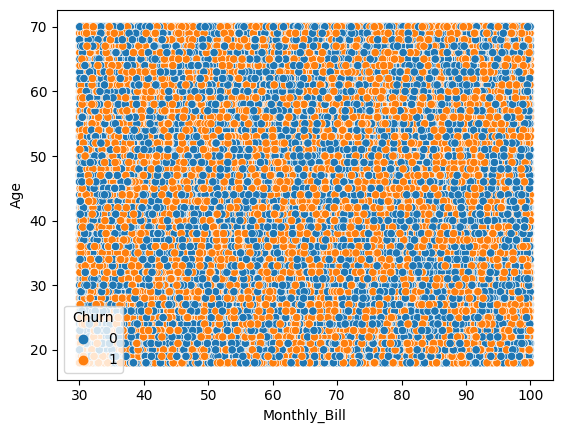

In [295]:
sns.scatterplot(data=df,x='Monthly_Bill',y='Age',hue='Churn')

From the The above Graph we can say that the Data is evenly divided in Gender and the age a few distrubsion in age 50 and 62 

Preparing the data for model & features Engerring & removing unwanted data

In [296]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [297]:
df.drop('Name',axis=1,inplace=True)#droping the unwanted features

In [298]:
df['total_bill_amount'] = df['Monthly_Bill'] * df['Subscription_Length_Months']  # Creating the new feature total bill by multiple monthly bill into sub len help check if total bill is effecting in churning or not


In [299]:
data = {
    'CustomerID': df['CustomerID'],
    'Age': df['Age'],
}
df1 = pd.DataFrame(data)

age_bins = [0, 29, 39, 49, 59, 100]  # creating the age group as it is diffcult to handle the different age it  help to anlysis reason
age_labels = ['0-29', '30-39', '40-49', '50-59', '60+']  # Labels for age groups

df['Age_Group'] = pd.cut(df1['Age'], bins=age_bins, labels=age_labels)#new feature name age_group
df

,CustomerID,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,total_bill_amount,Age_Group
0,1,63,Male,Los Angeles,17,73.36,236,0,1247.12,60+
1,2,62,Female,New York,1,48.76,172,0,48.76,60+
2,3,24,Female,Los Angeles,5,85.47,460,0,427.35,0-29
3,4,36,Female,Miami,3,97.94,297,1,293.82,30-39
4,5,46,Female,Miami,19,58.14,266,0,1104.66,40-49
...,...,...,...,...,...,...,...,...,...,...
99995,99996,33,Male,Houston,23,55.13,226,1,1267.99,30-39
99996,99997,62,Female,New York,19,61.65,351,0,1171.35,60+
99997,99998,64,Male,Chicago,17,96.11,251,1,1633.87,60+
99998,99999,51,Female,New York,20,49.25,434,1,985.00,50-59


Plotting relationships with the new features


<Axes: xlabel='Age_Group', ylabel='count'>

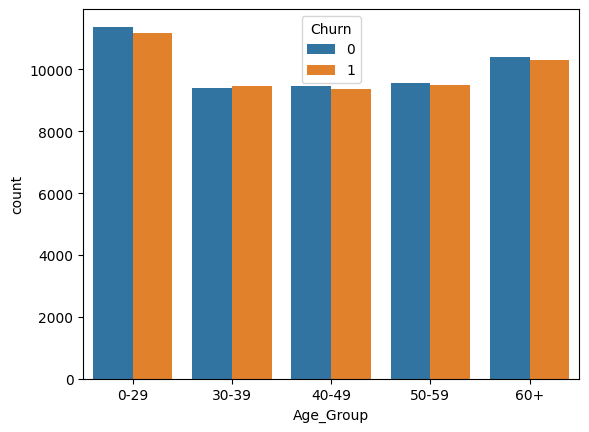

In [300]:
sns.countplot(data=df,x='Age_Group',hue='Churn')# As checking if under age some change in data

<Axes: xlabel='Churn', ylabel='total_bill_amount'>

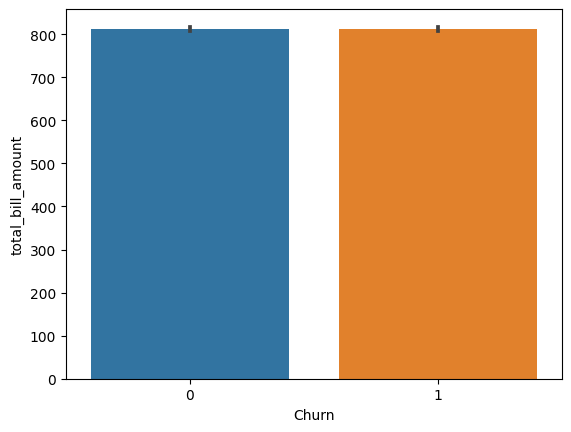

In [301]:
sns.barplot(data=df,x='Churn',y='total_bill_amount')

<Axes: xlabel='Age', ylabel='total_bill_amount'>

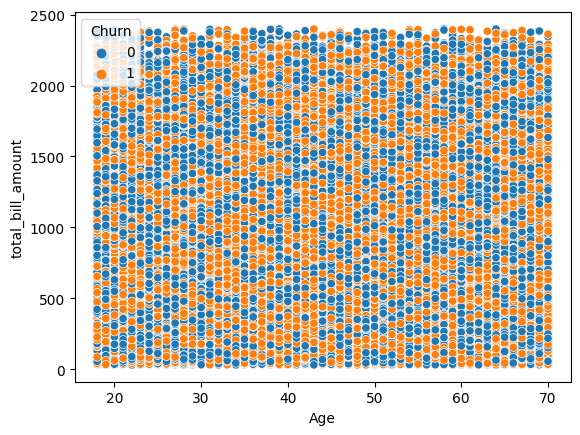

In [302]:
sns.scatterplot(data=df,x='Age',y='total_bill_amount',hue='Churn')

From the above we can say that it is very well divided the as all but there is no linear relation between many features 

In [303]:
#Dividing the dataset into test & train

In [310]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


In [311]:
encoder = OneHotEncoder() 
df_encoded = pd.get_dummies(df, columns=['Location','Gender'],drop_first=True) # as machine learning model take the number only so we are encoding the string into int 
# also droping the age_grop features 
df_encoded.drop('Age_Group',axis=1,inplace=True)

DIVIDING THE DATA IN TO 2 PART X INDEPENDENT FEATURES  & Y DEPENDENT FEATURES  
ALSO ON TRAIN &  TEST

In [312]:
x = df_encoded.drop(columns=['Churn'],axis=1)# Split the data into features (X) and target variable (y)

y = df_encoded['Churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)# Split into training and testing sets


In [313]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # STANDRISE THE DATA AS FOR THE MODEL 
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Creating and train the model RandomForestClassifier 

In [314]:
from sklearn.ensemble import RandomForestClassifier

# Create the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [315]:
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)

Checking  & Evaluate the Random Forest Classifier


In [316]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'The Accuracy Test Score : {accuracy}' )
print(f'The Precision Test Score : {precision}' )
print(f'The Recall Test Score : {recall}' )
print(f'The f1 Test Score : {f1}' )
print(f'The confusion matrix Test Score : {conf_matrix}' )

The Accuracy Test Score : 0.49296666666666666
The Precision Test Score : 0.48715771598386753
The Recall Test Score : 0.46369881465517243
The f1 Test Score : 0.47513888409647703
The confusion matrix Test Score : [[7904 7248]
 [7963 6885]]



Perform hyperparameter tuning for Random Forest


In [ ]:
# Perform hyperparameter tuning for Random Forest
from sklearn.model_selection import GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}
grid_search_rf = GridSearchCV(model, param_grid_rf, cv=5)
grid_search_rf.fit(x_train_scaled, y_train)
best_params_rf = grid_search_rf.best_params_

print("Best Hyperparameters for Random Forest:")
print(best_params_rf)

In [233]:

# Create the Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Fit the model to your training data
best_rf_model.fit(x_train_scaled, y_train)

# Predict on the test set
y_pred_rf = best_rf_model.predict(x_test_scaled)

# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f'The Random Forest Accuracy Test Score: {accuracy_rf}')
print(f'The Random Forest Precision Test Score: {precision_rf}')
print(f'The Random Forest Recall Test Score: {recall_rf}')
print(f'The Random Forest F1 Test Score: {f1_rf}')
print(f'The Random Forest Confusion Matrix Test Score: \n{conf_matrix_rf}')


The Random Forest Accuracy Test Score: 0.49983333333333335
The Random Forest Precision Test Score: 0.4940236010658546
The Random Forest Recall Test Score: 0.43702855603448276
The Random Forest F1 Test Score: 0.4637815816745881
The Random Forest Confusion Matrix Test Score: 
[[8506 6646]
 [8359 6489]]


    AS THE SCORE FOR THIS  MODEL IS NOT THAT SATISFY TRY WITH THE LINEAR REGRESSION MODEL 

In [241]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()

In [242]:
from sklearn.feature_selection import RFE

USING rfe CHECKING WHICH IS THE BEST FEATURE TO ADD IN OUR MODEL

In [243]:
rfe = RFE(model_lr,n_features_to_select=1,step=1) # selection only 1 so it provide the ranking to us out of 11 selecting 5 or 6
rfe = rfe.fit(x,y)
rfe.support_

array([ True, False, False, False, False, False, False, False, False,
       False, False])

In [244]:
rfe.ranking_

array([ 1,  5,  6,  4,  2,  3,  7,  8, 10,  9, 11])

In [245]:
 # as per the rfe only location and gender playing the major roll but there is some issue so not going with the rfe and taking all features

Againg dividing the  data usinng the csv for more accuracy 

In [246]:
x_tr_cv,x_test,y_tr_cv,y_test = train_test_split(x,y,test_size=0.2,random_state=4)

In [247]:
x_train,x_val,y_train,y_val = train_test_split(x_tr_cv,y_tr_cv,test_size = 0.25,random_state=4)

In [248]:
x_train.shape

(60000, 11)

In [249]:
x_train = x_train.astype(float) # converting the data into float ( in my system i m facing this issue that boolean is not consider as 0&1 )
x_val = x_val.astype(float)
y_train= y_train.astype(float)
y_val= y_val.astype(float)
x_test = x_test.astype(float)
y_test = y_test.astype(float)

In [250]:
scaler.fit(x_train)# model fit

StandardScaler()

In [251]:
x_train = scaler.transform(x_train) # scaler the data
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

In [252]:
model_lr = LogisticRegression() # Evaluate the Logistic Regression model


In [253]:
model_lr.fit(x_train,y_train) # model is fit 

LogisticRegression()

In [254]:
y_pred_lr = model_lr.predict(x_val)

In [255]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)# Evaluate the Logistic Regression model

precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test,y_pred_lr)

In [256]:
# Print the evaluation metrics for Logistic Regression
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_lr}")
print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print(f"F1 Score: {f1_lr}")

Logistic Regression Metrics:
Accuracy: 0.50255
Precision: 0.5047069541451564
Recall: 0.33203476176206176
F1 Score: 0.4005543170452492


Perform hyperparameter tuning for Logistic Regression


In [257]:
from sklearn.pipeline import make_pipeline

In [258]:
train_scores = []
val_scores = []


In [261]:
for la in np.arange(0.001,12000.0,100):
    scaled_lr = make_pipeline(scaler,LogisticRegression(C=1/la))
    scaled_lr.fit(x_train,y_train)
    train_score = scaled_lr.score(x_train,y_train)
    val_score = scaled_lr.score(x_val,y_val)
    train_scores.append(train_score)
    val_scores.append(val_score)

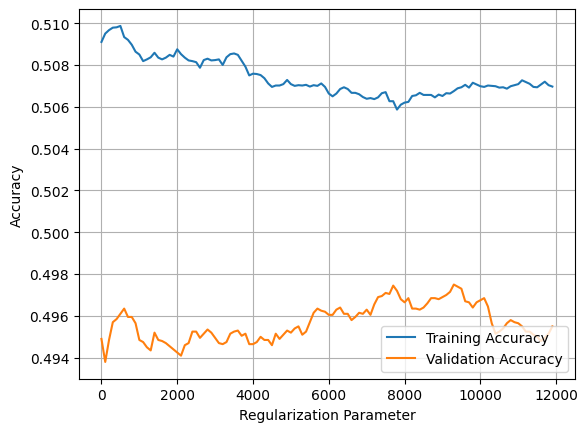

In [262]:
plt.figure()
plt.plot(list(np.arange(0.001, 12000.0, 100)), train_scores, label='Training Accuracy')
plt.plot(list(np.arange(0.001, 12000.0, 100)), val_scores, label='Validation Accuracy')

# Add a legend
plt.legend(loc='lower right')

# Label the x and y axes
plt.xlabel('Regularization Parameter')
plt.ylabel('Accuracy')

# Add a grid
plt.grid()

# Show the plot
plt.show()

In [263]:
np.argmax(val_score)

0

In [264]:
l_best = np.argmax(val_score)

In [265]:
scaler_lr = make_pipeline(scaler,LogisticRegression(C=1/l_best))

C:\Users\NCIN\AppData\Local\Temp\ipykernel_14252\4198670264.py:1: RuntimeWarning: divide by zero encountered in scalar divide
  scaler_lr = make_pipeline(scaler,LogisticRegression(C=1/l_best))


In [266]:
scaler_lr.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=inf))])

In [267]:
scaler_lr.score(x_test,y_test)

0.5049

In [271]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization penalty ('l1' or 'l2')
}

# Create the GridSearchCV object
grid_search = GridSearchCV(model_lr, param_grid, cv=5)

# Fit the model to your training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 0.001, 'penalty': 'l2'}


C:\Users\NCIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\NCIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\NCIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\NCIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sk

    FROM THE  LOGISTIC  REGRESSION ALSO THE RESULT IS ONLY 50% ACCURCY ONLY CHECKING FOR THE DEEP LEARNING 

Deep Learning model

In [272]:
import tensorflow as tf# Deep Learning with TensorFlow/Keras
from tensorflow import keras

In [273]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a simple feedforward neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])


In [276]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [277]:
x_train = x_train.astype(float)
x_test = x_test.astype(float)

In [278]:

# Train the model
model.fit(x_train, y_train, epochs=9, batch_size=32, validation_split=0.2)


Epoch 1/9
2000/2000 [==============================] - 6s 3ms/step - loss: 66.1106 - accuracy: 0.4974 - val_loss: 156.8244 - val_accuracy: 0.4976
Epoch 2/9
2000/2000 [==============================] - 5s 2ms/step - loss: 43.3778 - accuracy: 0.5019 - val_loss: 94.5349 - val_accuracy: 0.5029
Epoch 3/9
2000/2000 [==============================] - 5s 2ms/step - loss: 36.7717 - accuracy: 0.5005 - val_loss: 25.4636 - val_accuracy: 0.5015
Epoch 4/9
2000/2000 [==============================] - 7s 4ms/step - loss: 23.7396 - accuracy: 0.4999 - val_loss: 16.0170 - val_accuracy: 0.4983
Epoch 5/9
2000/2000 [==============================] - 12s 6ms/step - loss: 15.2420 - accuracy: 0.5008 - val_loss: 5.5028 - val_accuracy: 0.5025
Epoch 6/9
2000/2000 [==============================] - 14s 7ms/step - loss: 11.3824 - accuracy: 0.5010 - val_loss: 20.3423 - val_accuracy: 0.4968
Epoch 7/9
2000/2000 [==============================] - 8s 4ms/step - loss: 7.9435 - accuracy: 0.5025 - val_loss: 3.0954 - val_ac

In [279]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

625/625 [==============================] - 1s 2ms/step - loss: 3.0434 - accuracy: 0.4955
Test Loss: 3.043412446975708, Test Accuracy: 0.49549999833106995


In [280]:
import joblib

# Save the trained model
joblib.dump(model_lr, 'churn_model.pkl')

['churn_model.pkl']